# Communicate Data Findings: RITA Flight Data in 2008
## by HyunGyung Lee

## Preliminary Wrangling

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays in 2008.
The data comes originally from RITA.
Downloaded source is https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7. 

> Datasets used in this project:
    1. `2008.csv` : Main dataset to anlayze
    2. `airports.csv` : Describes the international airport abbreviation code name of the airport
    3. `carriers.csv` : Listing of carrier codes with full names
    4. `plane-data.csv` : Information about some individual planes

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2008.csv')
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
5,2008,1,3,4,2024.0,2020,2325.0,2325,WN,51,...,13.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1753.0,1745,2053.0,2050,WN,940,...,6.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,622.0,620,935.0,930,WN,2621,...,7.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,1944.0,1945,2210.0,2215,WN,389,...,7.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1453.0,1425,1716.0,1650,WN,519,...,6.0,13.0,0,NaN,0,11.0,0.0,0.0,0.0,15.0


In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info())

(2389217, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  Weat

In [4]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2389217.0,2.389217e+06,2.389217e+06,2.389217e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.389217e+06,2.389217e+06,2.319121e+06,...,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2008.0,2.505009e+00,1.566386e+01,3.909625e+00,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213888e+03,1.286189e+02,...,7.261589e+02,6.839862e+00,1.668584e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,0.0,1.121493e+00,8.750405e+00,1.980431e+00,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951392e+03,7.025303e+01,...,5.571763e+02,4.846435e+00,1.102905e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,...,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,...,5.830000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,...,9.570000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,...,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


### Cleaning Data

In [5]:
df_clean = df.copy()

In [6]:
# Apply a function that converts unique code to full data
## Load data tables

carriers = pd.read_csv('carriers.csv')
airports = pd.read_csv('airports.csv')
plane_data = pd.read_csv('plane-data.csv')

In [7]:
# Apply a function that converts unique code to full data
## UniqueCarrier code -> convert to full name of carrier
## TailNum code -> add manufacturer column
## Origin airport code -> convert to full name of origin city
## Dest airport code -> convert to full name of dest city

df_join = df_clean.join( airports[['iata','city']].rename(columns={'city':'Origin_City'}).set_index('iata'), how='left', on='Origin') \
.join( airports[['iata','city']].rename(columns={'city':'Dest_City'}).set_index('iata'), how='left', on='Dest') \
.join( plane_data[['tailnum', 'manufacturer']].set_index('tailnum'), how='left', on='TailNum') \
.join( carriers.rename(columns={'Description':'Carrier_Name'}).set_index('Code'), how='left', on='UniqueCarrier')

In [8]:
df_join

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin_City,Dest_City,manufacturer,Carrier_Name
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,0,16.0,0.0,0.0,0.0,0.0,Houston,Little Rock,BOEING,Southwest Airlines Co.
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,0,NaN,NaN,NaN,NaN,NaN,Houston,Midland,BOEING,Southwest Airlines Co.
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,0,NaN,NaN,NaN,NaN,NaN,Houston,Midland,BOEING,Southwest Airlines Co.
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,0,NaN,NaN,NaN,NaN,NaN,Houston,Orlando,BOEING,Southwest Airlines Co.
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,0,16.0,0.0,0.0,0.0,0.0,Houston,Orlando,BOEING,Southwest Airlines Co.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,0,NaN,NaN,NaN,NaN,NaN,Boston,Covington,BOEING,Delta Air Lines Inc.
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,0,NaN,NaN,NaN,NaN,NaN,Covington,Boston,MCDONNELL DOUGLAS AIRCRAFT CO,Delta Air Lines Inc.
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,0,NaN,NaN,NaN,NaN,NaN,Boston,Covington,BOEING,Delta Air Lines Inc.
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,0,NaN,NaN,NaN,NaN,NaN,Covington,Boston,BOEING,Delta Air Lines Inc.


In [9]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [30]:
# Delete useless columns in analysis
df_master = df_join.drop(['Year','DayofMonth', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
                    'Origin','ActualElapsedTime', 'CRSElapsedTime', 'Dest', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 
                          'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], 1)
df_master

,Month,DayOfWeek,AirTime,ArrDelay,DepDelay,Distance,Origin_City,Dest_City,manufacturer,Carrier_Name
0,1,4,55.0,16.0,18.0,393,Houston,Little Rock,BOEING,Southwest Airlines Co.
1,1,4,71.0,2.0,5.0,441,Houston,Midland,BOEING,Southwest Airlines Co.
2,1,4,71.0,-4.0,-6.0,441,Houston,Midland,BOEING,Southwest Airlines Co.
3,1,4,108.0,-2.0,8.0,848,Houston,Orlando,BOEING,Southwest Airlines Co.
4,1,4,107.0,16.0,23.0,848,Houston,Orlando,BOEING,Southwest Airlines Co.
...,...,...,...,...,...,...,...,...,...,...
2389212,4,4,108.0,-3.0,0.0,752,Boston,Covington,BOEING,Delta Air Lines Inc.
2389213,4,4,107.0,3.0,-1.0,752,Covington,Boston,MCDONNELL DOUGLAS AIRCRAFT CO,Delta Air Lines Inc.
2389214,4,4,103.0,3.0,0.0,752,Boston,Covington,BOEING,Delta Air Lines Inc.
2389215,4,4,106.0,-1.0,-2.0,752,Covington,Boston,BOEING,Delta Air Lines Inc.


In [31]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Month         int64  
 1   DayOfWeek     int64  
 2   AirTime       float64
 3   ArrDelay      float64
 4   DepDelay      float64
 5   Distance      int64  
 6   Origin_City   object 
 7   Dest_City     object 
 8   manufacturer  object 
 9   Carrier_Name  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 182.3+ MB


In [33]:
# Fix erroneous datatypes
# int -> category 
df_master.Month = df_master.Month.astype('category')
df_master.DayOfWeek = df_master.DayOfWeek.astype('category')

In [34]:
# descriptive statistics for numeric variables
df_master.describe()

,AirTime,ArrDelay,DepDelay,Distance
count,2.319121e+06,2.319121e+06,2.324775e+06,2.389217e+06
mean,1.051016e+02,1.027357e+01,1.143636e+01,7.261589e+02
std,6.766801e+01,3.963429e+01,3.653229e+01,5.571763e+02
min,0.000000e+00,-9.100000e+01,-9.200000e+01,1.700000e+01
25%,5.600000e+01,-9.000000e+00,-4.000000e+00,3.250000e+02
50%,8.700000e+01,0.000000e+00,0.000000e+00,5.830000e+02
75%,1.340000e+02,1.500000e+01,1.100000e+01,9.570000e+02
max,8.860000e+02,2.461000e+03,2.467000e+03,4.962000e+03


### What is the structure of your dataset?

> - There are 2389217 flights in the dataset with 21 variables. 
- Numeric varibles like ActualElapsedTime are time related. 
- Measurement of time related variables is minutes
  

### What is/are the main feature(s) of interest in your dataset?

> In this project, I would like to address the following topics related to flight:
- What is the relationship between AirTime or Distance with increase of delay time?
- Are there certain destination or arrival cities that are effect on increase of delay time?
- Are there certain carriers or manufacturers that have are effect on increase of delay time?
- What are the preferred month or day for flight delay to occur?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that several variables will have the effec on increase of delay time. I also think that month, day will have effects on flight.
- Air Time, Distance, Origin_City, Dest_City, manufacturer, Carrier_Name, Month and DayOfWeek will have relation with delay time   


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### I'll start by looking at the distribution of the main variable of interest: 
1. ArrDelay: arrival delay, in minutes
2. DepDelay:departure delay, in minute

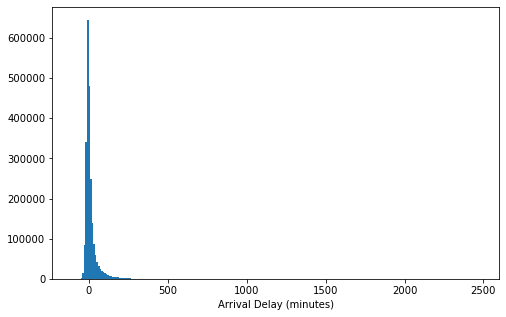

In [35]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(df_master['ArrDelay'].min()-binsize, df_master['ArrDelay'].max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'ArrDelay', bins = bins)
plt.xlabel('Arrival Delay (minutes)')
plt.show()

It looks like a long tail in the distribution with outliers. Approximately 95% of the flights were delayed less then 300 minutes. Also, according to descriptive statistics,value of 75% is about 150. Therefore I'll remove the outliers with long arrive delay.

** 멘트수정필요

In [36]:
# Remove outliers with IQR
# ref: https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr

# finding IQR with Departure delay time
dQ1 = df_master['DepDelay'].quantile(0.25)
dQ3 = df_master['DepDelay'].quantile(0.75)

dIQR = dQ3 - dQ1

# finding IQR with Arrival delay time
aQ1 = df_master['ArrDelay'].quantile(0.25)
aQ3 = df_master['ArrDelay'].quantile(0.75)

aIQR = aQ3 - aQ1

# Fillter out outliers
df_filltered = df_master.query( '(@dQ1 - 1.5 * @dIQR) <= DepDelay <= (@dQ3 + 1.5 * @dIQR) and (@aQ1 - 1.5 * @aIQR) <= ArrDelay <= (@aQ3 + 1.5 * @aIQR)' )

In [37]:
df_filltered.describe()

,AirTime,ArrDelay,DepDelay,Distance
count,2.014075e+06,2.014075e+06,2.014075e+06,2.014075e+06
mean,1.046829e+02,-8.419076e-01,1.033693e+00,7.277747e+02
std,6.769628e+01,1.439182e+01,9.135773e+00,5.598950e+02
min,0.000000e+00,-4.500000e+01,-2.600000e+01,2.400000e+01
25%,5.600000e+01,-1.000000e+01,-5.000000e+00,3.260000e+02
50%,8.600000e+01,-3.000000e+00,-1.000000e+00,5.810000e+02
75%,1.340000e+02,7.000000e+00,4.000000e+00,9.580000e+02
max,6.580000e+02,5.100000e+01,3.300000e+01,4.962000e+03


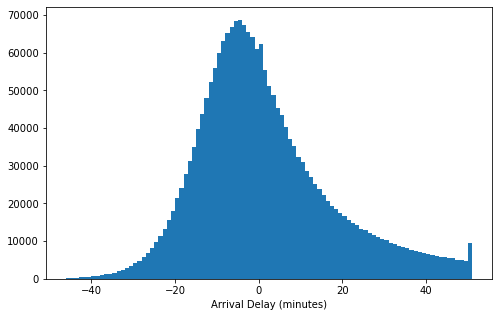

In [38]:
# start again with a standard-scaled(miniutes) plot
# distribution of Arrival Delay

binsize = 1
bins = np.arange(df_filltered['ArrDelay'].min()-binsize, df_filltered['ArrDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'ArrDelay', bins = bins)
plt.xlabel('Arrival Delay (minutes)')
plt.show()

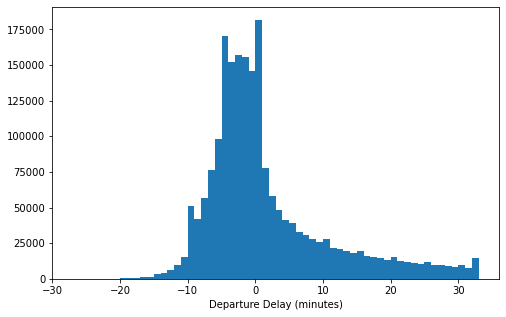

In [39]:
# start again with a standard-scaled(miniutes) plot
# distribution of Departure Delay

binsize = 1
bins = np.arange(df_filltered['DepDelay'].min()-binsize, df_filltered['DepDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'DepDelay', bins = bins)
plt.xlabel('Departure Delay (minutes)')
plt.show()

Both Arrival Delay and Departure Delay are **unimodal** and **skewed right**. Arrival Delay plot seems beautifully distributed but slightly skewed.  Departure Delay looks narrower than a normal distribution.

Next up, the first predictor variable of interest: <U>AirTime and Distance</U>

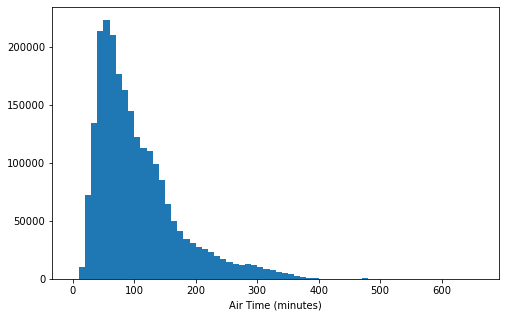

In [52]:
# plotting AirTime 

binsize = 10
bins = np.arange(0, df_filltered['AirTime'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'AirTime', bins = bins)
plt.xlabel('Air Time (minutes)')
plt.show()

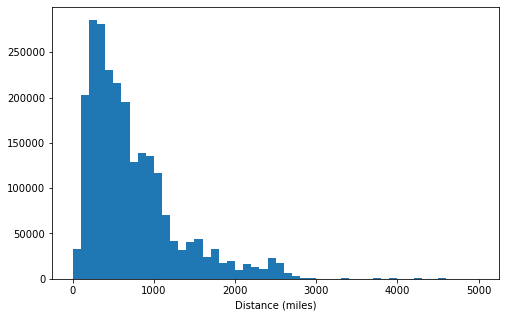

In [54]:
# plotting Distance

binsize = 100
bins = np.arange(0, df_filltered['Distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'Distance', bins = bins)
plt.xlabel('Distance (miles)')
plt.show()

## 짧은 해석

In [ ]:
# #df_master.query("ArrDelay >= 300")
# df_master['diff'] = df_master['DepDelay'] - df_master['ArrDelay']

In [ ]:
# binsize = 10
# bins = np.arange(0, df_master['diff'].max()+binsize, binsize)

# plt.figure(figsize=[8, 5])
# plt.hist(data = df_master, x = 'diff', bins = bins)
# plt.xlabel('Delay Diff (minutes)')
# plt.show()

In [ ]:
# Filter out outliers
df_master = df_master.query("ArrDelay <= 300")
df_master.describe()

In [ ]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(0, df_master['DepDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'DepDelay', bins = bins)
plt.xlabel('Departure Delay (minutes)')
plt.show()

Similiar with arrival delay, departure delay also looks like a long tail in the distribution with outliers. So this variable's outliers should be deleted too.

In [ ]:
# df_master.query("DepDelay >= 300")

In [29]:
df_master.query("Cancelled == 1")

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin_City,Dest_City,manufacturer,Carrier_Name
42,1,3,4,NaN,50.0,NaN,NaN,NaN,192,1,...,0,NaN,NaN,NaN,NaN,NaN,Houston,San Antonio,NaN,Southwest Airlines Co.
259,1,3,4,NaN,90.0,NaN,NaN,NaN,407,1,...,0,NaN,NaN,NaN,NaN,NaN,Las Vegas,Oakland,NaN,Southwest Airlines Co.
454,1,3,4,NaN,75.0,NaN,NaN,NaN,337,1,...,0,NaN,NaN,NaN,NaN,NaN,Los Angeles,Oakland,NaN,Southwest Airlines Co.
480,1,3,4,NaN,80.0,NaN,NaN,NaN,337,1,...,0,NaN,NaN,NaN,NaN,NaN,Los Angeles,San Francisco,NaN,Southwest Airlines Co.
482,1,3,4,NaN,80.0,NaN,NaN,NaN,337,1,...,0,NaN,NaN,NaN,NaN,NaN,Los Angeles,San Francisco,NaN,Southwest Airlines Co.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387945,4,16,3,NaN,77.0,NaN,NaN,NaN,411,1,...,0,NaN,NaN,NaN,NaN,NaN,Covington,Arlington,MCDONNELL DOUGLAS AIRCRAFT CO,Delta Air Lines Inc.
2387946,4,16,3,NaN,92.0,NaN,NaN,NaN,411,1,...,0,NaN,NaN,NaN,NaN,NaN,Arlington,Covington,MCDONNELL DOUGLAS AIRCRAFT CO,Delta Air Lines Inc.
2388936,4,17,4,NaN,146.0,NaN,NaN,NaN,761,1,...,0,NaN,NaN,NaN,NaN,NaN,Atlanta,New York,BOEING,Delta Air Lines Inc.
2389184,4,17,4,NaN,112.0,NaN,NaN,NaN,585,1,...,0,NaN,NaN,NaN,NaN,NaN,Salt Lake City,San Jose,MCDONNELL DOUGLAS,Delta Air Lines Inc.


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!